In [1]:
# Import libaries
import numpy as np                       # Math
import matplotlib.pyplot as plt          # Plots
from scipy.optimize import fsolve        # Numerically solve equations
from IPython.display import clear_output # Display settings
import time                              # Record time

from scipy.sparse import diags

In [2]:

# ==== INPUT PARAMETERS =====
length, height = 19,19 # cm
h = 0.5 # cm. Grid spacing.
nx,ny = int(length/h +1), int(height/h + 1)

x,y = np.arange(0,length+h,h), np.arange(0,height+h,h)
X,Y = np.meshgrid(x,y,indexing="xy")

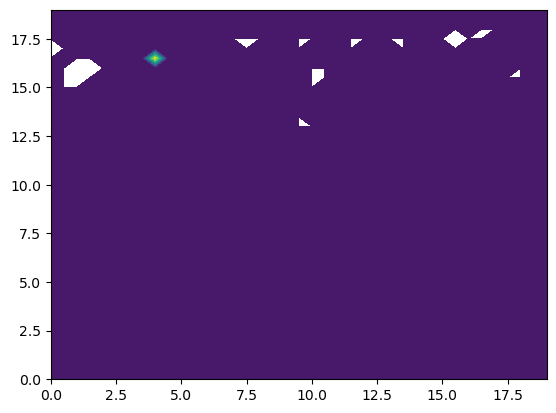

In [3]:
# from:
# https://aquaulb.github.io/book_solving_pde_mooc/solving_pde_mooc/notebooks/05_IterativeMethods/05_01_Iteration_and_2D.html#introduction
V = np.empty((nx,ny))
b = np.zeros_like(V)
bflat = b[1:-1,1:-1].flatten("C")

def d2_mat_dirichlet_2d(nx,ny,h):
    """
    Constructs the matrix for the centered second-order accurate
    second-order derivative for Dirichlet boundary conditions in 2D
    """
    a = 1.0 / h**2
    c = -4.0*a

    diag_a = a * np.ones((nx-2)*(ny-2)-1)
    diag_a[nx-3::nx-2] = 0.0
    diag_g = a * np.ones((nx-2)*(ny-3))
    diag_c = c * np.ones((nx-2)*(ny-2))

    diagonals = [diag_g, diag_a, diag_c, diag_a, diag_g]
    offsets = [-(nx-2), -1, 0, 1, nx-2]

    d2mat = diags(diagonals, offsets).toarray()

    return d2mat

def laplace_by_direct_inversion(nx,ny,h,bflat):
    A = d2_mat_dirichlet_2d(nx,ny,h)
    Ainv = np.linalg.inv(A)
    Vvec = np.reshape(np.dot(Ainv,bflat), (nx-2,ny-2), order="C")
    V[1:-1,1:-1] = Vvec
    V[0,:], V[-1,:], V[:,0], V[-1,:] = 0,0,0,0
    return V

fig,ax = plt.subplots()
ax.contourf(X,Y,V)

# But where can I impose the constant electrode potentials?